<a href="https://colab.research.google.com/github/dafon1986/Elecciones/blob/main/Muertes_Policiales_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ploytly
!pip install descartes
!pip install geojson
!pip install geopandas

ERROR: Could not find a version that satisfies the requirement ploytly (from versions: none)
ERROR: No matching distribution found for ploytly
     |████████████████████████████████| 972kB 5.8MB/s 
     |████████████████████████████████| 14.8MB 320kB/s 
     |████████████████████████████████| 6.5MB 41.5MB/s 


In [4]:
import pandas as pd
import geopandas
import shapely.wkt
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.figure_factory as ff
import numpy as np

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

Los datos estan guardados en Google Drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Primer archivo. Listado de Asesinatos policiales en EEUU (2015-2020)

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Programa Big Data /Trabajo Final/fatal-police-shootings-data.csv', warn_bad_lines=False, error_bad_lines=False, encoding='latin1')

In [8]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,6275,Caleb Slay,2020-11-02,shot,undetermined,25.0,M,NaN,Springfield,MO,False,undetermined,NaN,False,-93.280,37.182,True
5747,6280,John Mellone,2020-11-02,shot,vehicle,39.0,M,W,Lynn,MA,False,attack,Car,False,-70.963,42.460,True
5748,6284,NaN,2020-11-03,shot,gun,59.0,M,NaN,Beaumont,TX,False,attack,Not fleeing,False,-94.211,30.179,True
5749,6285,NaN,2020-11-03,shot,gun,NaN,M,NaN,San Antonio,TX,False,other,Not fleeing,False,-98.761,29.463,True


In [9]:
def from_wkt(df, wkt_column, crs='EPSG:4326'):
    
    df["coordinates"]= df[wkt_column].apply(shapely.wkt.loads)
        
    gdf = geopandas.GeoDataFrame(df, geometry='coordinates', crs=crs) 
    
    return gdf

In [10]:
def from_x_y(df, x, y, crs='EPSG:4326'):
    gdf = geopandas.GeoDataFrame(df.drop(['longitude', 'latitude'], axis=1),
                                crs=crs, 
                                geometry=geopandas.points_from_xy(df[x], df[y]))
    return gdf

In [11]:
df = from_x_y(df, "longitude", "latitude")

In [12]:
df.rename(columns={'gender': 'genero', 'race': 'raza','manner_of_death':'motivo de muerte','armed':'armado', 'age':'edad'}, inplace=True)

In [13]:
df

,id,name,date,motivo de muerte,armado,edad,genero,raza,city,state,signs_of_mental_illness,threat_level,flee,body_camera,is_geocoding_exact,geometry
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,True,POINT (-123.12200 47.24700)
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,True,POINT (-122.89200 45.48700)
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,True,POINT (-97.28100 37.69500)
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,True,POINT (-122.42200 37.76300)
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,True,POINT (-104.69200 40.38400)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,6275,Caleb Slay,2020-11-02,shot,undetermined,25.0,M,NaN,Springfield,MO,False,undetermined,NaN,False,True,POINT (-93.28000 37.18200)
5747,6280,John Mellone,2020-11-02,shot,vehicle,39.0,M,W,Lynn,MA,False,attack,Car,False,True,POINT (-70.96300 42.46000)
5748,6284,NaN,2020-11-03,shot,gun,59.0,M,NaN,Beaumont,TX,False,attack,Not fleeing,False,True,POINT (-94.21100 30.17900)
5749,6285,NaN,2020-11-03,shot,gun,NaN,M,NaN,San Antonio,TX,False,other,Not fleeing,False,True,POINT (-98.76100 29.46300)


Renombramos la raza

In [14]:
df.rename(index={'A':'Asiatico','B':'Negro','H':'Hispano','N':'Nativo','O':'Otros','W':'Blanco'}, inplace=True)

Ploteamos los puntos Geograficos de donde se dieron los asesinatos

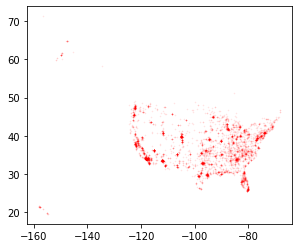

In [17]:
df.plot(color="red",alpha=0.08,markersize=0.5)

**Como juntar las fechas en años o meses**

In [19]:
shoot_x_raza = df.pivot_table(
    index="raza",
    values="id",
    aggfunc="count"
)

In [20]:
df.describe()

,id,edad
count,5751.000000,5486.000000
mean,3192.766475,37.141998
std,1800.591376,13.068367
min,3.000000,6.000000
25%,1633.500000,27.000000
50%,3194.000000,35.000000
75%,4761.500000,46.000000
max,6285.000000,91.000000


In [21]:
shoot_x_raza.rename(index={'A':'Asiatico','B':'Negro','H':'Hispano','N':'Nativo','O':'Otro','W':'Blanco'}, inplace=True)

In [22]:
shoot_x_raza.head()

,id
raza,
Asiatico,94
Negro,1353
Hispano,949
Nativo,81
Otro,47


Text(0, 0.5, 'id')

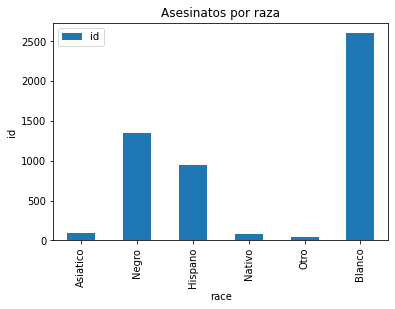

In [23]:
ax = shoot_x_raza.plot(kind='bar',
       title='Asesinatos por raza')
ax.set_xlabel('race')
ax.set_ylabel('id')

In [51]:
muertes_x_estado = df.pivot_table(
    columns="raza",
    index="state",
    values="id",
    aggfunc="count"
)

In [52]:
muertes_x_estado=muertes_x_estado.fillna(0)

In [53]:
muertes_x_estado.head()

raza,A,B,H,N,O,W
state,,,,,,
AK,2.0,3.0,0.0,9.0,0.0,22.0
AL,0.0,31.0,1.0,0.0,0.0,63.0
AR,1.0,25.0,0.0,0.0,0.0,47.0
AZ,0.0,17.0,89.0,13.0,0.0,109.0
CA,31.0,131.0,328.0,4.0,8.0,232.0


In [54]:
muertes_x_estado['Total'] = muertes_x_estado['A'] + muertes_x_estado['B'] +muertes_x_estado['H'] +muertes_x_estado['N'] +muertes_x_estado['O'] +muertes_x_estado['W'] 

In [55]:
Estados_con_mas_muertes = muertes_x_estado[(muertes_x_estado['Total'] > 100)]

Hay mas muertos blanco o no blancos (HISPANOS/NEGROS)

In [57]:
def f(x):
    if (x['B'] + x['H'] > x['W']):
        return 'Mayor cantidad de muertos No Blancos'
    else:
        return 'Mayor cantidad de muertos Blancos'
Estados_con_mas_muertes = Estados_con_mas_muertes.assign(indice=Estados_con_mas_muertes.apply(f, axis=1))

In [58]:
Estados_con_mas_muertes.sort_values('Total',ascending=False)

raza,A,B,H,N,O,W,Total,indice
state,,,,,,,,
CA,31.0,131.0,328.0,4.0,8.0,232.0,734.0,Mayor cantidad de muertos No Blancos
TX,6.0,106.0,152.0,1.0,3.0,182.0,450.0,Mayor cantidad de muertos No Blancos
FL,1.0,115.0,54.0,0.0,5.0,170.0,345.0,Mayor cantidad de muertos Blancos
AZ,0.0,17.0,89.0,13.0,0.0,109.0,228.0,Mayor cantidad de muertos Blancos
CO,5.0,18.0,52.0,5.0,2.0,99.0,181.0,Mayor cantidad de muertos Blancos
GA,3.0,78.0,10.0,0.0,0.0,82.0,173.0,Mayor cantidad de muertos No Blancos
NC,1.0,53.0,8.0,0.0,0.0,94.0,156.0,Mayor cantidad de muertos Blancos
OK,3.0,32.0,9.0,7.0,0.0,105.0,156.0,Mayor cantidad de muertos Blancos
OH,2.0,57.0,1.0,0.0,3.0,88.0,151.0,Mayor cantidad de muertos Blancos


**como plotear sin la columna total??**

Text(0, 0.5, 'Total')

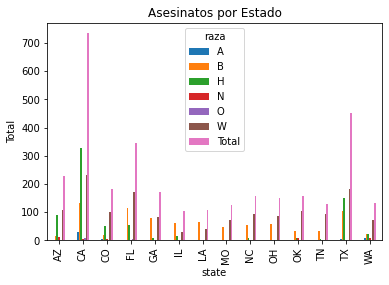

In [59]:
ax = Estados_con_mas_muertes.plot(kind='bar',
       title='Asesinatos por Estado')
ax.set_xlabel('state')
ax.set_ylabel('Total')

In [32]:
geomap = geopandas.read_file('/content/drive/MyDrive/Programa Big Data /Trabajo Final/usa-2016-presidential-election-by-county.geojson')

In [33]:
geomap = geomap.drop(columns=['votes16_kenistonc','votes16_maturenm','votes16_kenistonc','votes16_la_rivag','votes16_kopitkek','votes16_hoeflingt','votes16_silvar','votes16_atwoodf','votes16_lyttleb','votes16_kotlikoffl','dem12','other08_frac','rep08_frac','votes16_maldonadoj','votes16_duncanr','votes16_whitej','votes16_jacobp','votes16_mooreheadm','votes16_vacekd','votes16_giordanir','votes16_skewesp','votes16_none_of_these_candidates','median_earnings_2010_dollars', 'temp','children_in_single_parent_households', 'summer_tmin', 'maxalc','votes16_soltysike','votes16_castled','votes16_hedgesj','votes16_kahnl','votes16_de_la_fuenter','votes16_copelands','votes16_kennedya','votes16_smithm','votes16_scottr','votes16_steinj','votes16_mcmulline','other08','winter_tavg','winter_tavg','spring_prcp','autumn_tmax','adult_smoking','sexually_transmitted_infections','poor_mental_health_days','winter_prcp','dem12_frac2','dem12_frac','total08','dem12_frac','autumn_tmin','autumn_prcp','elevation','rep12_frac','dem08','annual_tmin','statecode_prev','statecode_prev','mar','other12','annual_tmax','nearest_county','elevation_bins','winter_tmax','summer_tmax', 'spring_tavg','injury_deaths','injury_deaths','low_birthweight','cfs', 'est_votes_remaining','autumn_tavg','rep12', 'meanalc','dem08_frac', 'summer_prcp', 'rep08', 'dem08_frac2','spring_tmin', 'reporting', 'spring_tmax','s','lon_bins','ca', 'precincts', 'lon','summer_tavg', 'precip_bins','rep12_frac2', 'other12_frac','annual_prcp', 'violent_crime', 'annual_tavg','rep08_frac2', 'winter_tmin','teen_births','other','total12','mixedness','acfs', 'name_prev', 'population_some_other_race_or_races','lat','preschool_enrollment_ratio_enrolled_ages_3_and_4', 'poor_physical_health_days', 'precip', 'sire_homogeneity'])

In [34]:
geomap.columns

Index(['unemployment', 'median_age', 'asian',
       'management_professional_and_related_occupations', 'total_population',
       'votes', 'rep16_frac', 'black', 'white_not_latino_population',
       'graduate_degree', 'sales_and_office_occupations', 'rep16_frac2',
       'gini_coefficient', 'amerindian', 'at_least_bachelor_s_degree',
       'children_under_6_living_in_poverty', 'african_american_population',
       'latino_population', 'libert16_frac', 'state',
       'asian_american_population', 'dem16_frac', 'votes16_johnsong',
       'votes16_clintonh', 'fips', 'votes16_trumpd',
       'farming_fishing_and_forestry_occupations', 'other16_frac',
       'less_than_high_school', 'name_16', 'adult_obesity',
       'production_transportation_and_material_moving_occupations',
       'homicide_rate', 'service_occupations',
       'construction_extraction_maintenance_and_repair_occupations',
       'adults_65_and_older_living_in_poverty', 'white',
       'native_american_population', 'inf

In [ ]:
#Como hacer para que queden las estadisticas sociales en un mismo mapa? 

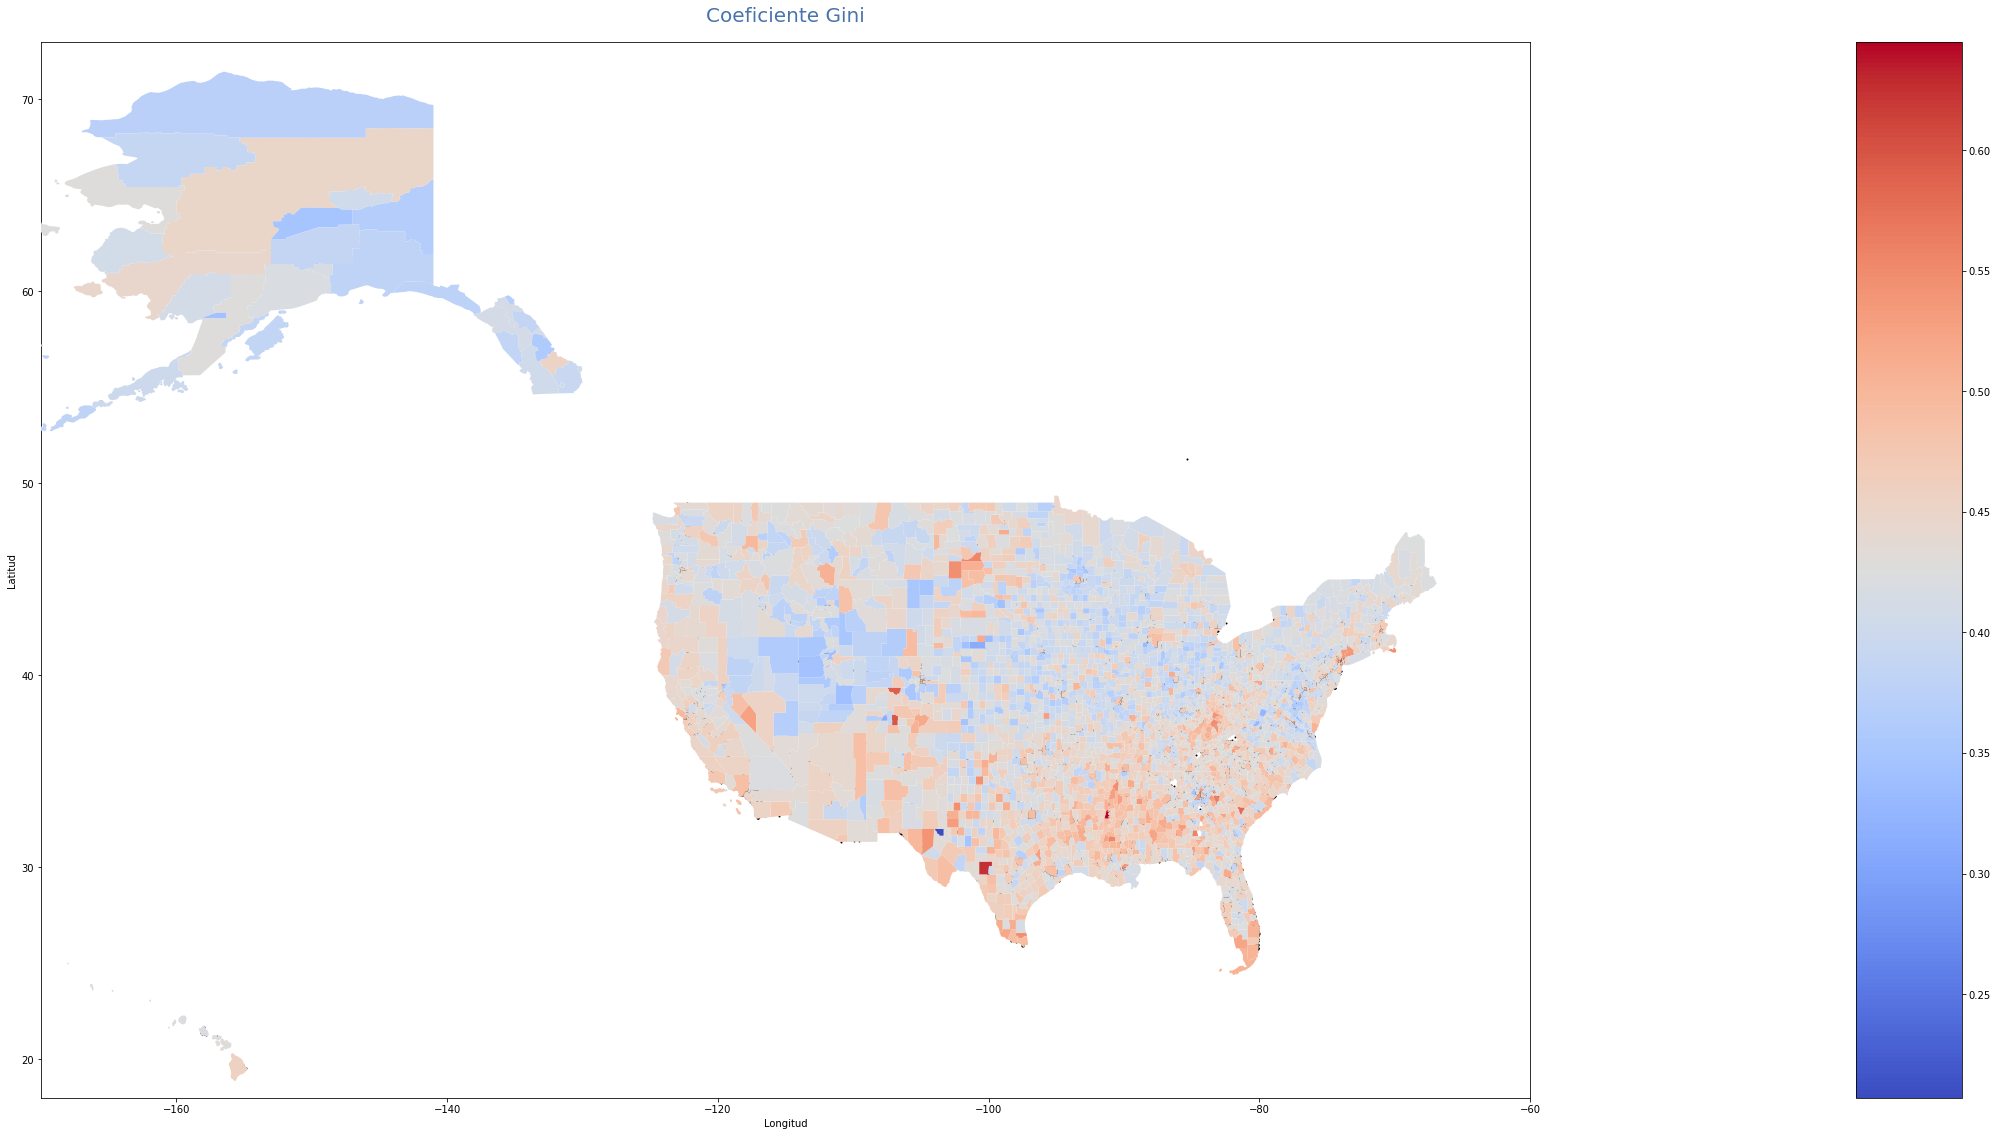

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(40, 40))
ax.axis([-170, -60, 18, 73])
ax.set_title('Coeficiente Gini', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
Mapa_Muertes=df.plot(ax=ax,marker="o",cax=cax,color='black',markersize=1, alpha = 1)
geomap.plot(column='gini_coefficient', cmap='coolwarm', ax=Mapa_Muertes,
              legend=True, cax=cax,zorder=5)


plt.show();

In [37]:
resultados=geomap[['state','county','votes16_trumpd','votes16_johnsong','votes16_clintonh','geometry']]

In [38]:
resultados

,state,county,votes16_trumpd,votes16_johnsong,votes16_clintonh,geometry
0,Georgia,"DeKalb County, Georgia",47531.0,9209.0,239131.0,"POLYGON ((-84.34848 33.82540, -84.34752 33.967..."
1,Texas,"Wilbarger County, Texas",3166.0,115.0,807.0,"POLYGON ((-99.47529 34.08562, -99.47511 34.395..."
2,Virginia,"Lunenburg County, Virginia",3206.0,88.0,2226.0,"POLYGON ((-78.39738 37.08605, -78.39670 37.087..."
3,Georgia,"Walton County, Georgia",31093.0,1053.0,8279.0,"POLYGON ((-83.91562 33.74470, -83.98220 33.786..."
4,North Carolina,"Avery County, North Carolina",6226.0,164.0,1670.0,"POLYGON ((-82.01644 36.14508, -81.96010 36.228..."
...,...,...,...,...,...,...
3138,Tennessee,"Obion County, Tennessee",9525.0,193.0,2425.0,"POLYGON ((-89.25634 36.50632, -88.95975 36.502..."
3139,Michigan,"Macomb County, Michigan",224589.0,12860.0,176238.0,"POLYGON ((-82.72928 42.70606, -82.71966 42.703..."
3140,West Virginia,"Braxton County, West Virginia",3516.0,157.0,1315.0,"POLYGON ((-80.93340 38.74669, -80.85072 38.792..."
3141,North Carolina,"Mitchell County, North Carolina",6225.0,138.0,1585.0,"POLYGON ((-82.24515 36.13101, -82.24155 36.137..."


In [39]:
def color_selector(x):
    if (x['votes16_johnsong'] <= x['votes16_clintonh'] < x['votes16_trumpd']):
        return 'Trump'
    elif (x['votes16_johnsong'] <= x['votes16_trumpd'] < x['votes16_clintonh']):
        return 'Clinton'
    elif (x['votes16_trumpd'] <= x['votes16_clintonh'] < x['votes16_johnsong']):
        return 'Jhonson'
    else:
        return ''
resultados = resultados.assign(ganador=resultados.apply(color_selector, axis=1))

In [44]:
resultados

,state,county,votes16_trumpd,votes16_johnsong,votes16_clintonh,geometry,ganador
0,Georgia,"DeKalb County, Georgia",47531.0,9209.0,239131.0,"POLYGON ((-84.34848 33.82540, -84.34752 33.967...",Clinton
1,Texas,"Wilbarger County, Texas",3166.0,115.0,807.0,"POLYGON ((-99.47529 34.08562, -99.47511 34.395...",Trump
2,Virginia,"Lunenburg County, Virginia",3206.0,88.0,2226.0,"POLYGON ((-78.39738 37.08605, -78.39670 37.087...",Trump
3,Georgia,"Walton County, Georgia",31093.0,1053.0,8279.0,"POLYGON ((-83.91562 33.74470, -83.98220 33.786...",Trump
4,North Carolina,"Avery County, North Carolina",6226.0,164.0,1670.0,"POLYGON ((-82.01644 36.14508, -81.96010 36.228...",Trump
...,...,...,...,...,...,...,...
3138,Tennessee,"Obion County, Tennessee",9525.0,193.0,2425.0,"POLYGON ((-89.25634 36.50632, -88.95975 36.502...",Trump
3139,Michigan,"Macomb County, Michigan",224589.0,12860.0,176238.0,"POLYGON ((-82.72928 42.70606, -82.71966 42.703...",Trump
3140,West Virginia,"Braxton County, West Virginia",3516.0,157.0,1315.0,"POLYGON ((-80.93340 38.74669, -80.85072 38.792...",Trump
3141,North Carolina,"Mitchell County, North Carolina",6225.0,138.0,1585.0,"POLYGON ((-82.24515 36.13101, -82.24155 36.137...",Trump


In [40]:
resultados_por_estado = resultados.groupby(by="state").sum()

In [41]:
resultados_por_estado

,votes16_trumpd,votes16_johnsong,votes16_clintonh
state,,,
Alabama,1306925.0,43869.0,718084.0
Alaska,0.0,0.0,0.0
Arizona,1021154.0,80151.0,936250.0
Arkansas,677904.0,29518.0,378729.0
California,3916209.0,402406.0,7362490.0
Colorado,1137455.0,129451.0,1212209.0
Connecticut,668266.0,48051.0,884432.0
Delaware,185103.0,14751.0,235581.0
District of Columbia,11553.0,4501.0,260223.0


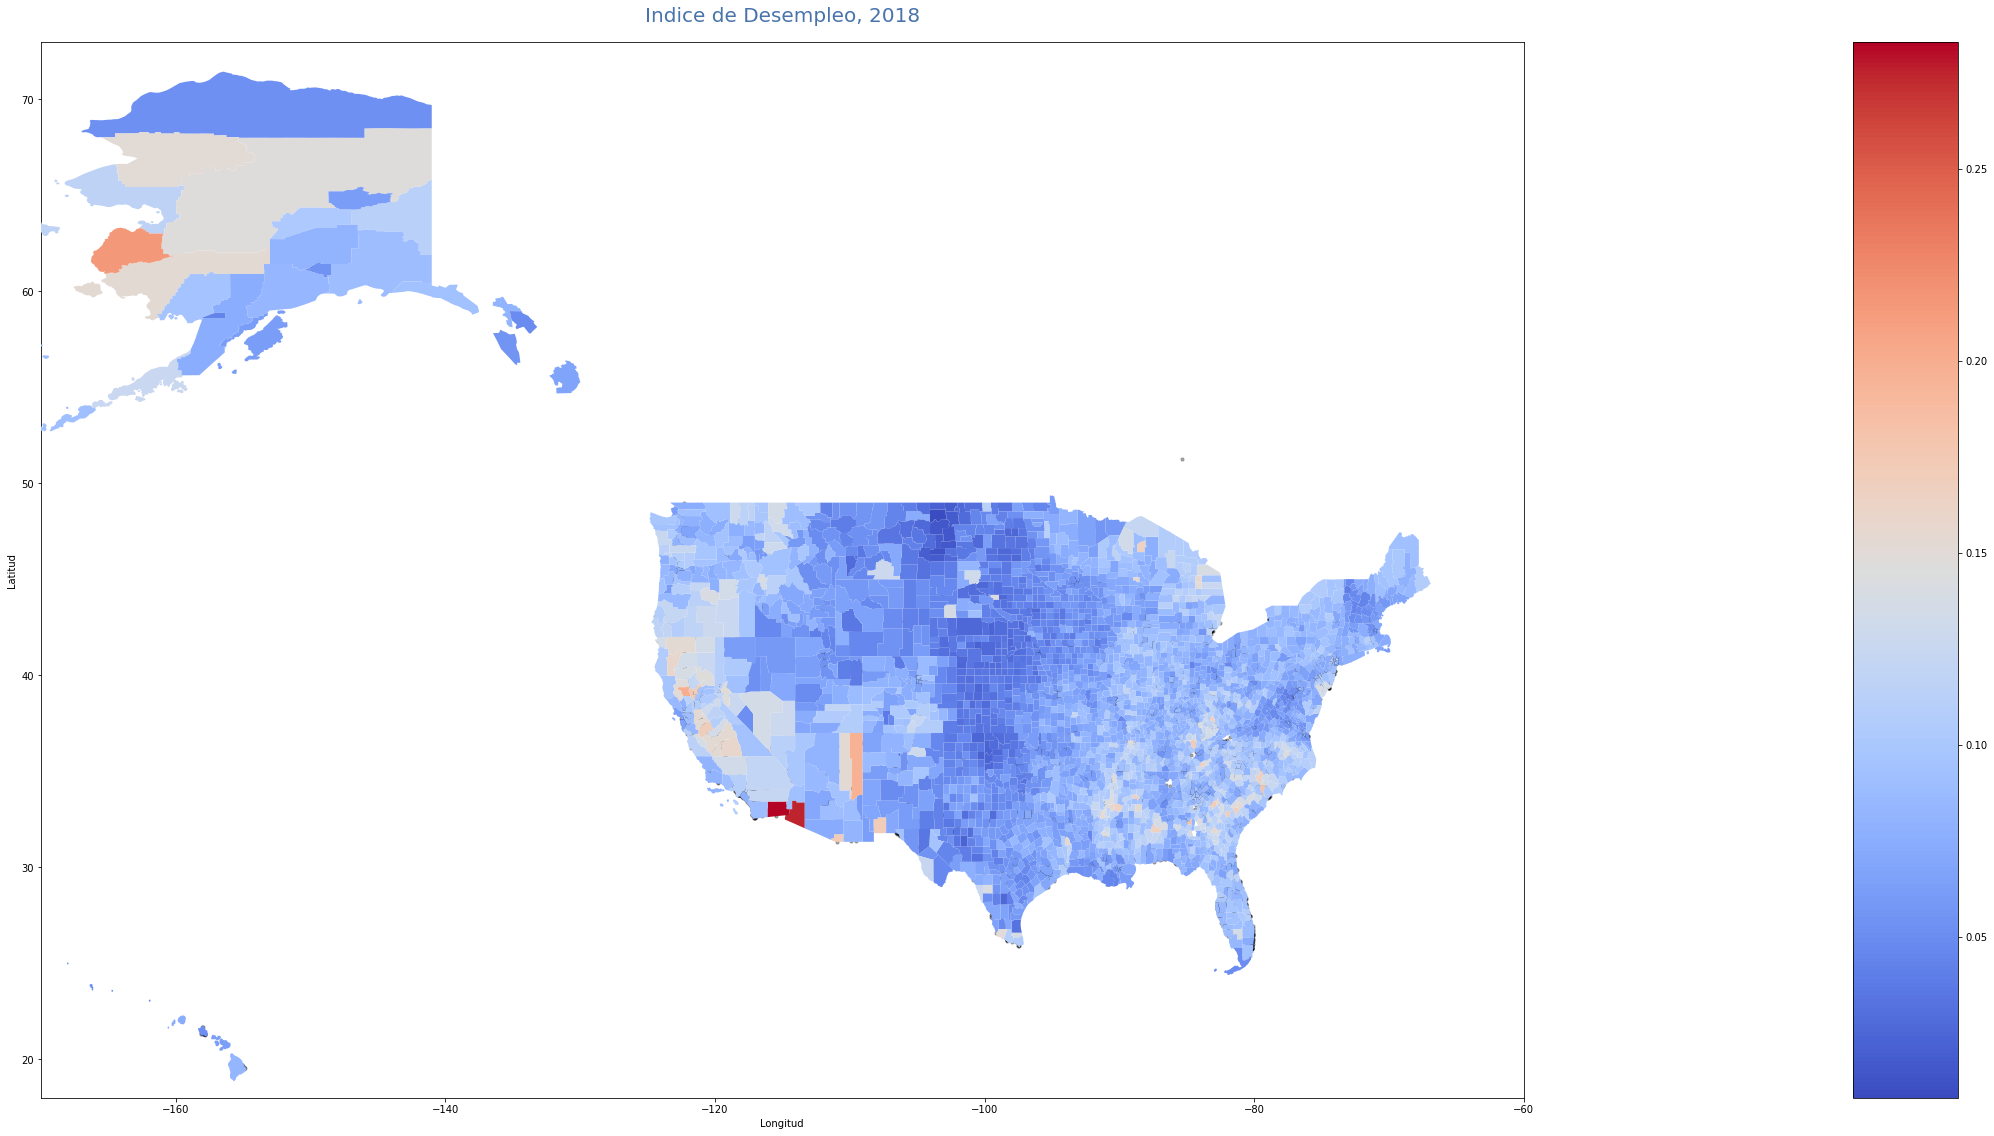

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(40, 40))
ax.axis([-170, -60, 18, 73])
ax.set_title('Indice de Desempleo, 2018', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

Mapa_Muertes=geomap.plot(column='unemployment', cmap='coolwarm', ax=ax,
              legend=True, cax=cax, zorder=5)
df1.plot(ax=Mapa_Muertes, marker="o",color='black',markersize=10, alpha = 0.3)

plt.show();

[]

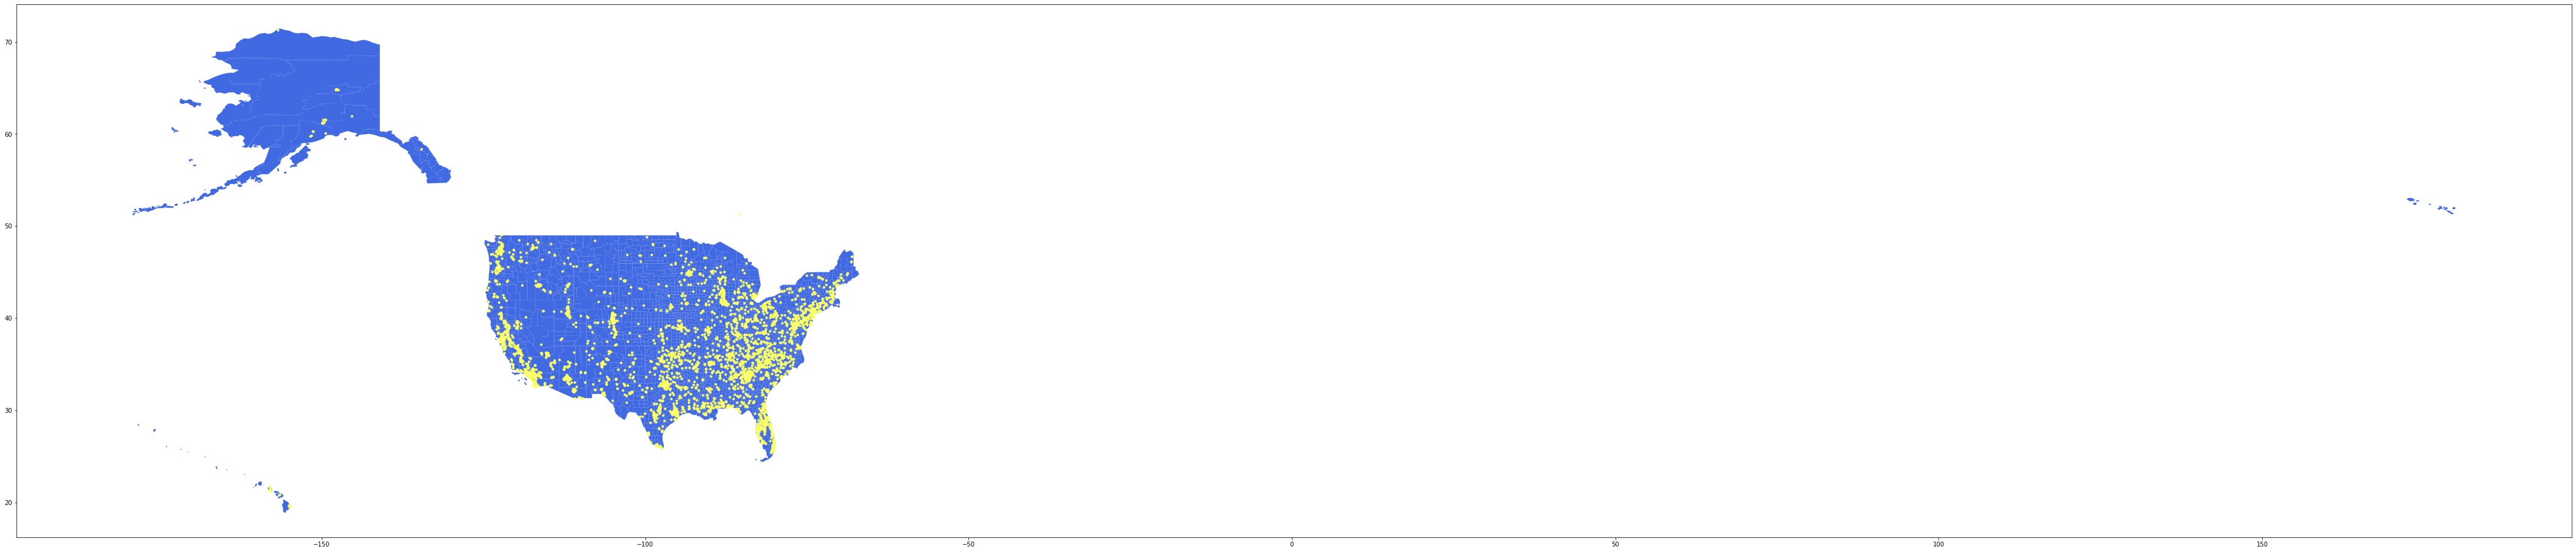

In [ ]:
gridCRS = geomap.crs
df1['geometry']=df1['geometry'].to_crs(crs=gridCRS)
figsize = (75, 50)
Mapa_Muertes_Policiales = geomap.plot(linewidth=0.03, figsize=figsize,color='royalblue')
df1.plot(ax=Mapa_Muertes_Policiales,color='#faff67',markersize=10)
Mapa_Muertes_Policiales.plot()